# Diabetes Health Prediction

In [2]:
# Install seaborn
%pip install seaborn

#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

Note: you may need to restart the kernel to use updated packages.


## Data Extraction

In [3]:
df = pd.read_csv('./cleanData.csv')

In [4]:
df.shape
df.head()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0
1,2.0,1.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0
2,2.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,2.0,4.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0
3,2.0,1.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0
4,1.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0


In [5]:
df = df.fillna(0)
df = df.astype('uint8')
df.head()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
0,2,2,2,2,2,4,2,2,2,2,...,0,0,2,0,0,0,0,1,1,1
1,2,1,4,2,2,5,2,2,2,5,...,0,0,0,0,0,0,0,1,1,1
2,2,1,4,1,2,4,2,2,2,4,...,0,0,0,0,0,0,0,1,1,1
3,2,1,3,2,2,5,2,2,2,5,...,0,0,2,0,0,0,0,1,1,1
4,1,1,3,2,2,3,2,2,2,4,...,0,0,2,0,0,0,0,1,1,0


In [6]:
df.describe()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
count,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.00000,...,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.000000,223345.00000,223345.000000
mean,0.832877,0.944033,2.006353,0.949571,0.955065,2.304806,0.948174,0.965564,0.967821,1.85055,...,0.028736,0.360048,0.698462,0.010365,0.031136,0.016875,0.040005,1.048306,1.09788,0.930941
std,0.936261,1.179674,2.107280,0.967820,0.971454,2.377964,0.968805,0.979019,0.981055,2.02708,...,0.167063,0.690395,1.008057,0.160159,0.173685,0.128804,0.195972,0.220101,0.36212,0.253555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
75%,2.000000,2.000000,4.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,4.00000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
max,4.000000,5.000000,5.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,5.00000,...,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.00000,1.000000


In [7]:
df.columns

Index(['Life Satisfaction', 'Emotional Support', 'Loneliness', 'Employment',
       'Food Stamps', 'Food Insecurity', 'Bill Insecurity',
       'Utility Insecurity', 'Transportation Insecurity', 'Stress', 'Diabetes',
       'Marital Status', 'Education Level', 'Own or Rent Home', 'Has Phone',
       'Veteran', 'Employment Status', 'Children', 'Household Income',
       'Pregnant', 'Smoker', 'Alcohol Consumption', 'Drug Use', 'Depressed',
       'Sex', 'Female Sexual Orientation', 'Transgender', 'Drunk Family',
       'Drugs In Family', 'Divorced Parents', 'Primary Language',
       'Urban or Rural', 'Health Plan'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223345 entries, 0 to 223344
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Life Satisfaction          223345 non-null  uint8
 1   Emotional Support          223345 non-null  uint8
 2   Loneliness                 223345 non-null  uint8
 3   Employment                 223345 non-null  uint8
 4   Food Stamps                223345 non-null  uint8
 5   Food Insecurity            223345 non-null  uint8
 6   Bill Insecurity            223345 non-null  uint8
 7   Utility Insecurity         223345 non-null  uint8
 8   Transportation Insecurity  223345 non-null  uint8
 9   Stress                     223345 non-null  uint8
 10  Diabetes                   223345 non-null  uint8
 11  Marital Status             223345 non-null  uint8
 12  Education Level            223345 non-null  uint8
 13  Own or Rent Home           223345 non-null  uint8
 14  Has 

In [7]:
df.groupby(['Diabetes']).size()

Diabetes
0    195519
1      4705
2     23121
dtype: int64

## Balance Data

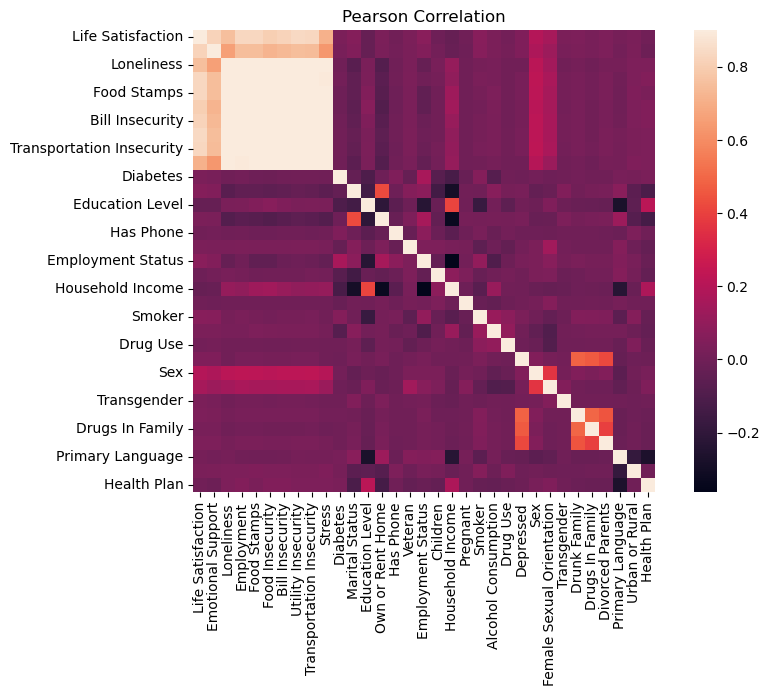

In [8]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [9]:
#Rebalance Data
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_res, y_res = sm.fit_resample(X, y)



Note: you may need to restart the kernel to use updated packages.


In [10]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())

(410589, 32)
(410589,)
(175968, 32)
(175968,)
Diabetes
2    137075
0    136828
1    136686
Name: count, dtype: int64


## Random Forest Model

In [11]:
#build model
rf = RandomForestClassifier(random_state = 42, max_features = 'sqrt', n_estimators=22, class_weight='balanced')
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8771310692853246

## Save Model

In [12]:
import joblib
joblib.dump(rf, "random_forest_model.joblib")
print("Model trained and saved as 'random_forest_model.joblib'")

Model trained and saved as 'random_forest_model.joblib'


In [13]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[1 2 0 ... 1 1 0]


In [14]:
#check MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.3075729678123295
Root Mean Squared Error : 0.5545926142785617


[[53756  1139  3796]
 [ 2385 54337  2111]
 [ 7038  5152 46254]]


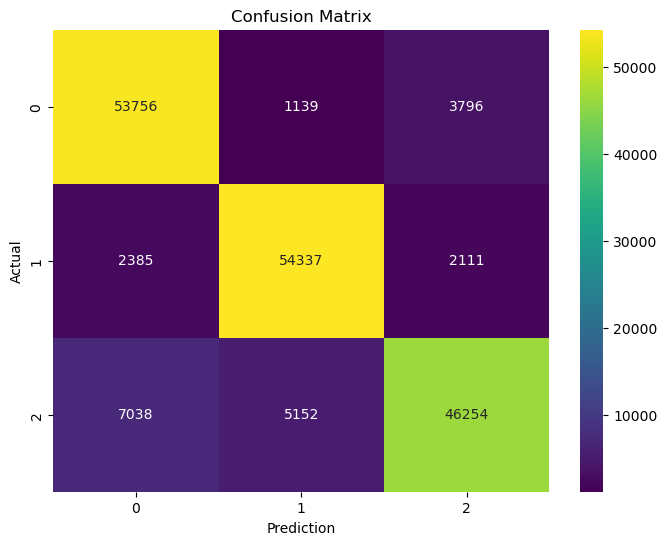

In [15]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [16]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     58691
           1       0.90      0.92      0.91     58833
           2       0.89      0.79      0.84     58444

    accuracy                           0.88    175968
   macro avg       0.88      0.88      0.88    175968
weighted avg       0.88      0.88      0.88    175968



## Check Feature Importance

In [17]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Household Income             0.124934
Education Level              0.077423
Alcohol Consumption          0.074538
Employment Status            0.071663
Marital Status               0.069186
Children                     0.064161
Smoker                       0.052456
Own or Rent Home             0.048909
Stress                       0.038478
Emotional Support            0.036516
Loneliness                   0.036494
Sex                          0.036097
Urban or Rural               0.035476
Female Sexual Orientation    0.032237
Life Satisfaction            0.027547
Has Phone                    0.027140
Veteran                      0.021816
Food Insecurity              0.017811
Primary Language             0.012925
Health Plan                  0.012350
Employment                   0.011031
Drug Use                     0.009671
Divorced Parents             0.009430
Bill Insecurity              0.009314
Food Stamps                  0.008818
Utility Insecurity           0.008212
Transportati

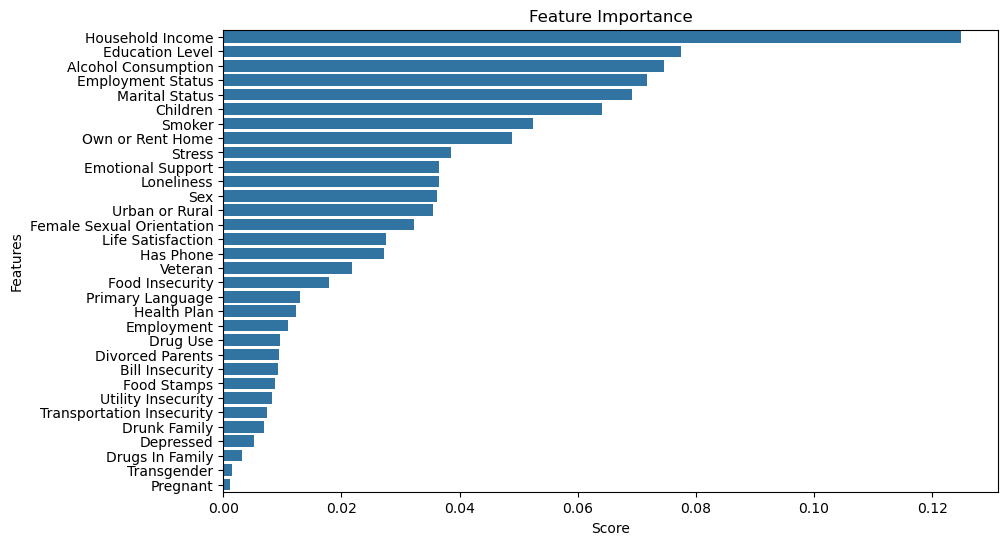

In [18]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [19]:
# #visualize diabetes status
# plt.figure(figsize = (8,6))
# sns.countplot(df['Diabetes'])
# plt.title("Diabetes Status")
# plt.show()